In [ ]:
pip install wordcloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tqdm import tqdm
import re
import collections
from wordcloud import STOPWORDS
from scipy.sparse import csr_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/train.tsv",sep='\t')

FileNotFoundError: ignored

In [ ]:
train_data.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,1436222,Tarte rainforest after dark colored clay,1,Beauty/Makeup/Makeup Palettes,Tarte,36.0,1,"A brand-new, unused, unopened, undamaged item...."
1,402989,Mac mineralize skin finish,3,Beauty/Makeup/Face,MAC,15.0,1,"Color is gold deposit, about 85% of product left"
2,638275,White Case iPhone 6/6s,1,"Electronics/Cell Phones & Accessories/Cases, C...",NaN,3.0,1,New Ultra thin Candy TPU Silicone Rubber Soft


**Observations:**


*   We have 8 features in our dataset in which price is our target variable.
*   The target variable have a continious values which means It's a regression machine learning model.
     

    *   Train-id: id of the product (numerical)
    *   Name: the title of the listing.(textual)
    *   item_condition_id - the condition of the items provided by the seller (numerical)
    *   category_name - category of the listing(categorical)
    *   brand_name - brand of the product (categorical)
    *   price - the price that the item was sold for. (target)
    *   shipping - 1 if shipping fee is paid by seller and 0 by buyer(binary)
    *   item_description - the full description of the item.(textual)



In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037774 entries, 0 to 1037773
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1037774 non-null  int64  
 1   name               1037774 non-null  object 
 2   item_condition_id  1037774 non-null  int64  
 3   category_name      1033392 non-null  object 
 4   brand_name         594827 non-null   object 
 5   price              1037774 non-null  float64
 6   shipping           1037774 non-null  int64  
 7   item_description   1037772 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 63.3+ MB


In [ ]:
train_data.describe()

,train_id,item_condition_id,price,shipping
count,1.037774e+06,1.037774e+06,1.037774e+06,1.037774e+06
mean,7.411749e+05,1.907535e+00,2.673494e+01,4.470511e-01
std,4.280261e+05,9.032218e-01,3.862050e+01,4.971887e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.707685e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.410010e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111633e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.004000e+03,1.000000e+00


In [ ]:
train_data.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          4382
brand_name           442947
price                     0
shipping                  0
item_description          2
dtype: int64

**Observations:**


*   As expected this dataset contains missing values which are usually known as NaN values and before applying any model on such type of data we need to fill that data or simply make it as a empty strings.


In [ ]:
count=train_data['item_condition_id'].value_counts()
count

1    448408
3    302823
2    262565
4     22307
5      1671
Name: item_condition_id, dtype: int64

Text(0, 0.5, 'Count')

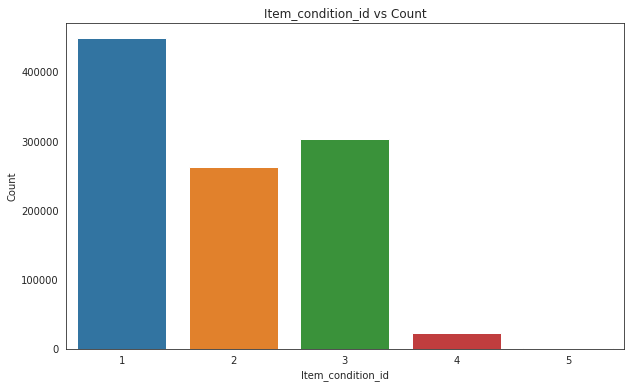

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('white')
sns.barplot(count.index[:5],count[:5])
plt.title('Item_condition_id vs Count')
plt.xlabel('Item_condition_id')
plt.ylabel('Count')

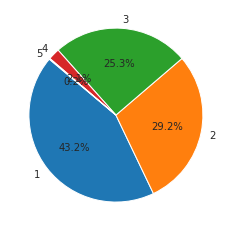

In [ ]:
labels = ['1','2','3','4','5']
sizes = count
# Plot
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', startangle=140)
plt.show()

**Observations:**


    *   Item_condition_id with 1 as a id is the most repeating one in the products.
    *   Nearly 60 lakhs of products have condition_id 1.
    *   item_condition_id with 5 as a id is the least repeating one and occurs only in 0.2% of the rows



**Price:**

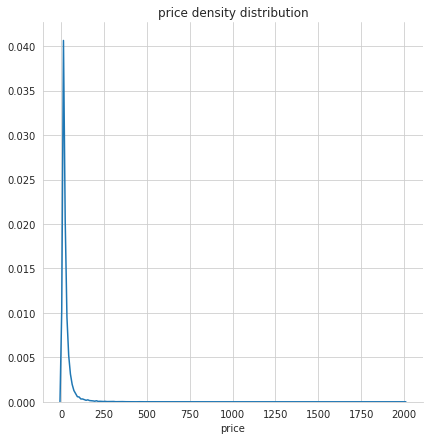

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(train_data,size=6) \
    .map(sns.kdeplot,"price") \
    .add_legend();
plt.title('price density distribution')
plt.show();

In [ ]:
for i in range(0, 100, 10):
    var =train_data["price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 7.0
20 percentile value is 10.0
30 percentile value is 12.0
40 percentile value is 14.0
50 percentile value is 17.0
60 percentile value is 20.0
70 percentile value is 26.0
80 percentile value is 34.0
90 percentile value is 51.0
100 percentile value is  2004.0


In [ ]:
for i in range(90, 100, 1):
    var =train_data["price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 51.0
91 percentile value is 55.0
92 percentile value is 58.0
93 percentile value is 62.0
94 percentile value is 67.0
95 percentile value is 75.0
96 percentile value is 85.0
97 percentile value is 99.0
98 percentile value is 121.0
99 percentile value is 170.0
100 percentile value is  2004.0


**Observation:**
     
       * Prices range is mostly between 0 and 250
       * Most Prices are less than 50
       * there is only one price above 170 which is 2004 rest all prices are below 171

Text(0, 0.5, 'No. of items')

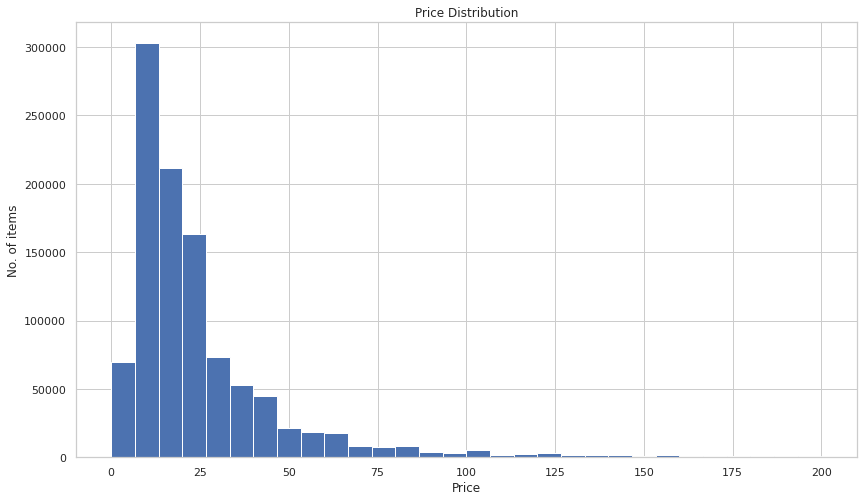

In [ ]:
sns.set()
sns.set_style('whitegrid')
fig,ax=plt.subplots(figsize=(14,8))
ax.hist(train_data['price'],bins=30,range=[0,200],label="Price Distribution")
plt.title('Price Distribution')
ax.set_xlabel('Price')
ax.set_ylabel('No. of items')

### It can be seen that price is skewed to the left hence to remove left skewness we are taking log of price

Text(0, 0.5, 'No. of items')

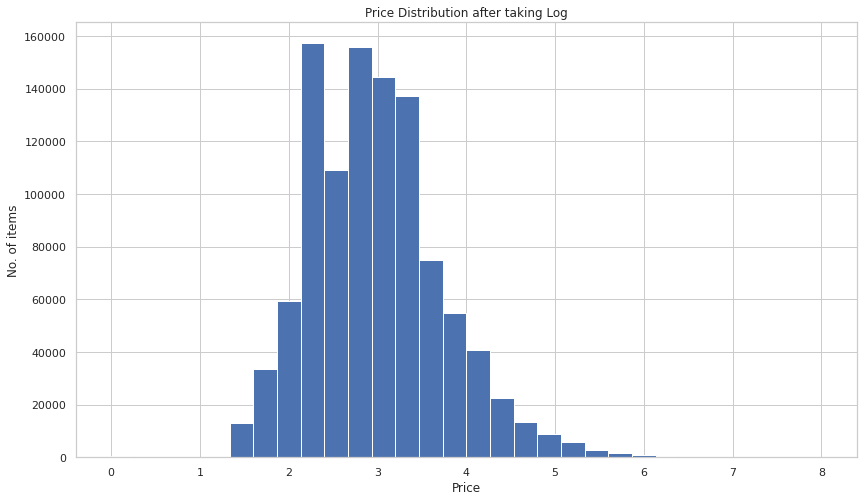

In [ ]:
train_data['logPrice']=np.log(train_data['price']+1)
fig,ax=plt.subplots(figsize=(14,8))
ax.hist(train_data['logPrice'],bins=30,range=[0,8])
plt.title('Price Distribution after taking Log')
ax.set_xlabel('Price')
ax.set_ylabel('No. of items')

**Shipping:**

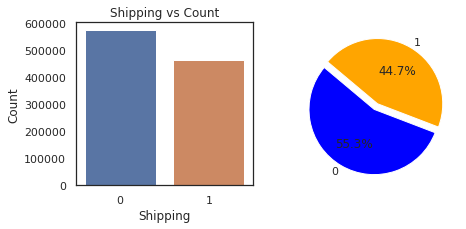

In [ ]:
sns.set_style("white")
count=train_data['shipping'].value_counts()
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
sns.barplot(count.index,count)
plt.xlabel('Shipping')
plt.ylabel('Count')
plt.title('Shipping vs Count')
plt.subplot(1,2,2)
labels = ['0','1']
sizes = count
colors = ['blue','orange']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=140)
plt.show()

In [ ]:
buyer_charged=[]
n=len(train_data)
i=0
while i<n:
    if train_data['shipping'][i]==0:
        buyer_charged.append(train_data['logPrice'][i])
    i+=1

In [ ]:
seller_charged=[]
i=0
n=len(train_data)
while i<n:
    if train_data['shipping'][i]==1:
        seller_charged.append(train_data['logPrice'][i])
    i+=1

Text(0, 0.5, 'No. of items')

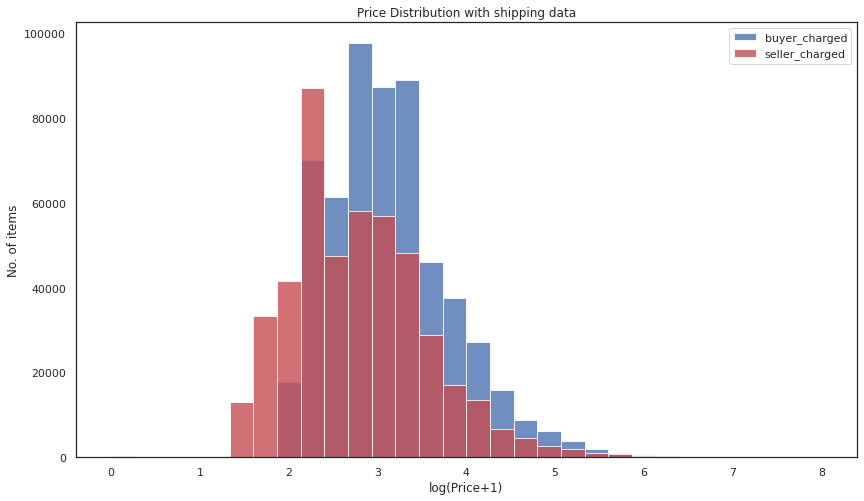

In [ ]:
fig,ax=plt.subplots(figsize=(14,8))
ax.hist(buyer_charged,bins=30,range=[0,8],label='buyer_charged',color='b',alpha=0.8)
ax.hist(seller_charged,bins=30,range=[0,8],label='seller_charged',color='r',alpha=0.8)
plt.title('Price Distribution with shipping data')
plt.legend(loc='upper right')
ax.set_xlabel('log(Price+1)')
ax.set_ylabel('No. of items')

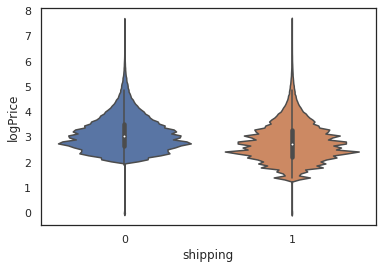

In [ ]:
sns.set_style("white")
sns.violinplot(x="shipping", y="logPrice", data=train_data)
plt.show()

**Observations:**


 * we can see that for the items with less price the shipping value is charged mostly by seller while for the items with high price the shipping price is charged by buyer. 
 * Also for most of the items the shipping price is paid by the buyer for about 55.3% items.
 * From the graph we can see that most of the range is merging with each other.


**item_condition_id vs Price:**

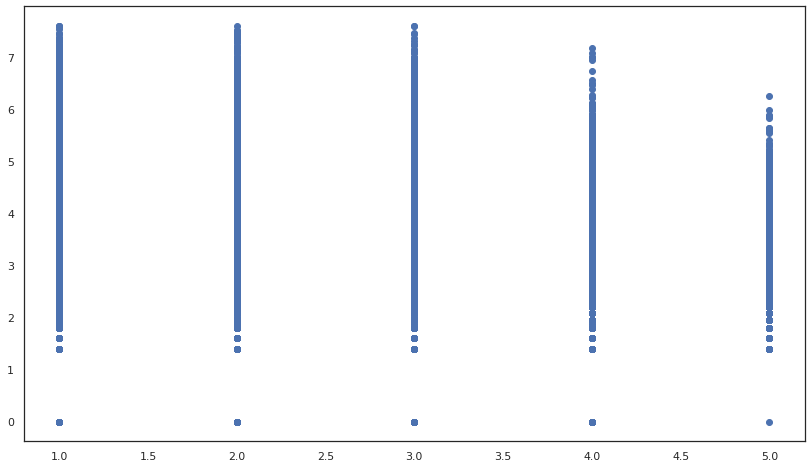

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(train_data['item_condition_id'],train_data['logPrice'])
plt.show()

**Observations:**


    * Items which are priced higher have item_condition_id as 1,2,3
    * Most of the items have item_condition_id as 1,2,3,4
    * Items having item_condition_id as 5 are very few and priced average

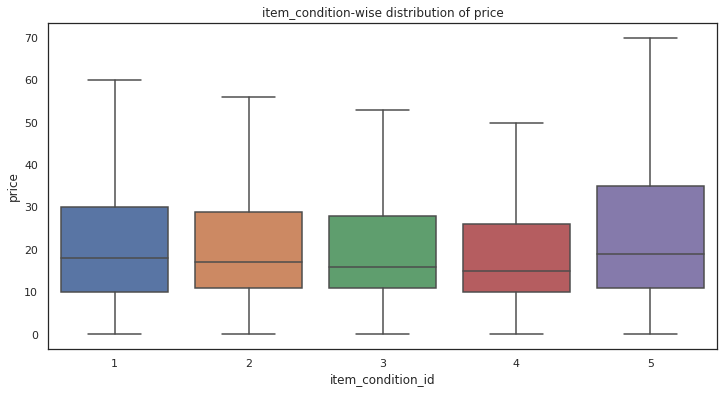

In [ ]:
sns.set(style='white')
plt.figure(figsize=(12,6))
sns.boxplot(x='item_condition_id', y='price', data=train_data, showfliers=False)
plt.title('item_condition-wise distribution of price')
plt.show()

**Observations:**


    *   The 50th percentile of products with item_condition_id 5 is more than the products with other condition id's.
    *   Almost all the boxplots have the same range except item_condition_id with 5 as a value.
    *   Here is slight variation of price based on item condition. Median Price decreases as we go from condition 1 to 4. Items in condition 5 seem to be having higher price, which is a bit strange


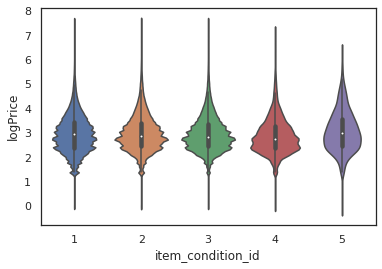

In [ ]:
sns.violinplot(x='item_condition_id',y='logPrice',data=train_data)
plt.show()

**Observations:**


    *   The above plot is the witness of the above observations.



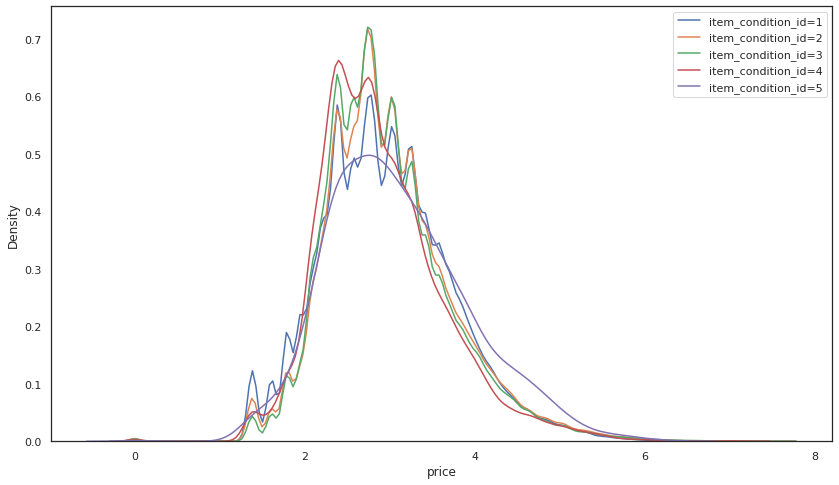

In [ ]:
plt.figure(figsize=(14,8))
id1=np.log(train_data.loc[train_data['item_condition_id']==1,'price']+1)
id2=np.log(train_data.loc[train_data['item_condition_id']==2,'price']+1)
id3=np.log(train_data.loc[train_data['item_condition_id']==3,'price']+1)
id4=np.log(train_data.loc[train_data['item_condition_id']==4,'price']+1)
id5=np.log(train_data.loc[train_data['item_condition_id']==5,'price']+1)
sns.distplot(id1,hist=False,label='item_condition_id=1')
sns.distplot(id2,hist=False,label='item_condition_id=2')
sns.distplot(id3,hist=False,label='item_condition_id=3')
sns.distplot(id4,hist=False,label='item_condition_id=4')
sns.distplot(id5,hist=False,label='item_condition_id=5')
plt.legend()
plt.show()

**Observations:**


    *   The above pdf plots shows the peakedness of the item_condition_id's.
    *   As i stated above condition id with 5 has the highest peakedness in the plot.
    *   All the plots are coinciding with each other.
    *   Hence items with item_condition_id as 5 occur very less and that also are distributed very sparsely throughout the column
    * Items with condition id as 3 and 4 are present very densely throughout the column.



### Deleting rows with price <3 or price>200

In [ ]:
print('Removed {} rows' .format(len(train_data[train_data.price<=0])+len(train_data[train_data.price>199])))
train_data = train_data[train_data.price > 0].reset_index(drop=True)
train_data=train_data[train_data.price<200].reset_index(drop=True)

Removed 8208 rows


In [ ]:
train_data.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'logPrice'],
      dtype='object')

**Splitting the Training Data:**


    1.   Splitting up the data mainly useful for hyperparameter tuning part of machine learning.
    2.   Every task of machine learning plays a key role in model training and to make our model fairly well on test data tuning hyperparameters is very important. 
    3.   And for that task we need data which is often taken from train data in small portion like 1% or 2% basing on the size of training data and can be refered as cross validation data or simply validation data.

    *   Here I found 831 products with 0 price.
    *   Their will be no product in the market with price <=0. They might be outliers or human errors.
    *   So here we are removing the products with <=0 price.

In [ ]:
train_data,cv_data=train_test_split(train_data,test_size=0.1,random_state=42)
print(train_data.shape)
print(cv_data.shape)

(926609, 9)
(102957, 9)


**Observations:**


*   We can see that our data consists of Null values.
*   As a formost step we need to fill the Null values with the most prominent values.
*   We can see the category name consists of three subcategories in each row as a preprocessing step let's make them into three different categories and filling the Nan values with empty string values.



**Preprocessing annd EDA of Textual Data**  

 ***
 
 Handling NAN values  
 
 ***

In [ ]:
def handle_category(data):
  """this function splits the category_name into further three sub_categories."""
  cat1=[]
  cat2=[]
  cat3=[]
  i=0
  for row in data:
    try:
      categories=row.split('/')
    except:
      categories=['','','']  #a blank is kept for missing values in category column 
    cat1.append(categories[0])
    cat2.append(categories[1])
    cat3.append(categories[2])
    i+=1
  return cat1,cat2,cat3

In [ ]:
c1,c2,c3=handle_category(train_data['category_name'])
train_data['sub_category1']=c1
train_data['sub_category2']=c2
train_data['sub_category3']=c3

In [ ]:
c1,c2,c3=handle_category(cv_data['category_name'])
cv_data['sub_category1']=c1
cv_data['sub_category2']=c2
cv_data['sub_category3']=c3

In [ ]:
train_data.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,logPrice,sub_category1,sub_category2,sub_category3
284810,166458,Men's Nike Medium t-shirts free ship,3,Men/Tops/T-shirts,Nike,30.0,1,All 8 of these t-shirts are size medium guys N...,3.433987,Men,Tops,T-shirts
468291,610392,Michigan jacket sz. L,4,Men/Athletic Apparel/Jackets,NaN,19.0,0,No description yet,2.995732,Men,Athletic Apparel,Jackets
203672,793357,Lane Bryant 18/20 plus size cowl neck,3,Women/Sweaters/Cowl Neck,Lane Bryant,14.0,0,This is a Lane Bryant Plus Size 18/20 Black co...,2.708050,Women,Sweaters,Cowl Neck


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926609 entries, 284810 to 121958
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           926609 non-null  int64  
 1   name               926609 non-null  object 
 2   item_condition_id  926609 non-null  int64  
 3   category_name      922724 non-null  object 
 4   brand_name         529591 non-null  object 
 5   price              926609 non-null  float64
 6   shipping           926609 non-null  int64  
 7   item_description   926607 non-null  object 
 8   logPrice           926609 non-null  float64
 9   sub_category1      926609 non-null  object 
 10  sub_category2      926609 non-null  object 
 11  sub_category3      926609 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 91.9+ MB


In [ ]:
#filling null values of item_description and brand_name
train_data['item_description'].fillna(value='No description given',inplace=True)
train_data['brand_name'].fillna(value='Not known',inplace=True)
train_data.isnull().sum()

train_id                0
name                    0
item_condition_id       0
category_name        3885
brand_name              0
price                   0
shipping                0
item_description        0
logPrice                0
sub_category1           0
sub_category2           0
sub_category3           0
dtype: int64

In [ ]:
cv_data['item_description'].fillna(value='No description given',inplace=True)
cv_data['brand_name'].fillna(value='Not known',inplace=True)
cv_data.isnull().sum()

train_id               0
name                   0
item_condition_id      0
category_name        455
brand_name             0
price                  0
shipping               0
item_description       0
logPrice               0
sub_category1          0
sub_category2          0
sub_category3          0
dtype: int64

Loading test data

In [ ]:
test_data=pd.read_csv("/content/drive/MyDrive/test.tsv",sep='\t')
test_data.head(3)
test=test_data.copy()

In [ ]:
print("shape of the test data: ",test_data.shape)
test_data.isnull().sum()

shape of the test data:  (444761, 7)


id                        0
name                      0
item_condition_id         0
category_name          1945
brand_name           189735
shipping                  0
item_description          2
dtype: int64

In [ ]:
print("Number of Nan values in category_name: {}%".format((test_data['category_name'].isnull().sum()/test_data.shape[0])*100))
print("Number of Nan values in brand_name: {}%".format((test_data['brand_name'].isnull().sum()/test_data.shape[0])*100))
print("Number of Nan values in item description: {}%".format((test_data['item_description'].isnull().sum()/test_data.shape[0])*100))

Number of Nan values in category_name: 0.43731352344292773%
Number of Nan values in brand_name: 42.65999042182206%
Number of Nan values in item description: 0.00044967971562254785%


**Filling Nan values in test data:**

In [ ]:
c1,c2,c3=handle_category(test_data['category_name'])
test_data['sub_category1']=c1
test_data['sub_category2']=c2
test_data['sub_category3']=c3

In [ ]:
test_data['brand_name'].fillna(value='Not known',inplace=True)
test_data['item_description'].fillna(value='No description given',inplace=True)
test_data.isnull().sum()

id                      0
name                    0
item_condition_id       0
category_name        1945
brand_name              0
shipping                0
item_description        0
sub_category1           0
sub_category2           0
sub_category3           0
dtype: int64

**Exploratory Data Analysis:**

**Univariate Analysis**

**sub_category1:**

Number of Unique Category1: 11


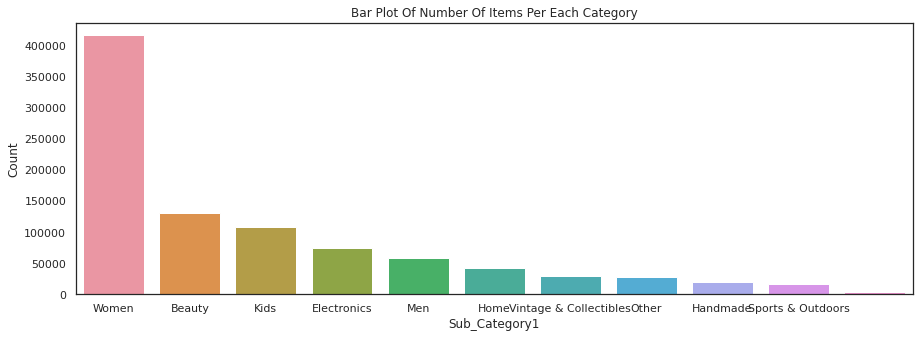

In [ ]:
count=train_data['sub_category1'].value_counts()
print("Number of Unique Category1: {}".format(len(count)))
plt.figure(figsize=(15,5))
sns.barplot(count.index,count)
plt.title("Bar Plot Of Number Of Items Per Each Category")
plt.xlabel('Sub_Category1')
plt.ylabel('Count')
plt.show()

**Observations:**

*   We can see that the top three main categories of the products are women,Beauty and kids.
*   The missing values are very less compare to every other category 

**Sub_category-2**

Number Of Unique Category2: 114


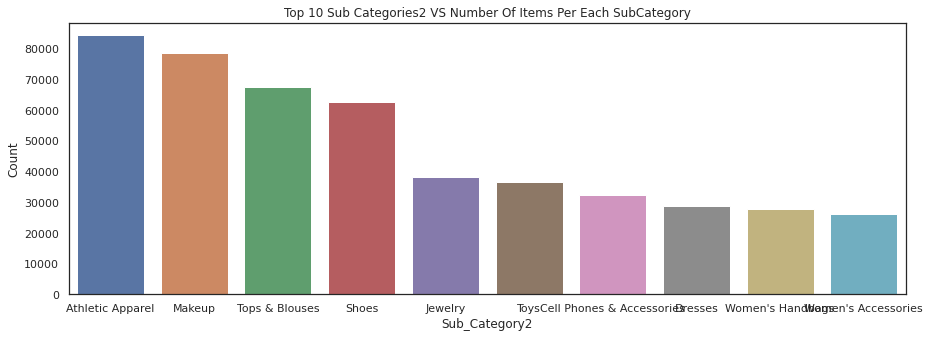

In [ ]:

count=train_data['sub_category2'].value_counts()
print("Number Of Unique Category2: {}".format(len(count)))
plt.figure(figsize=(15,5))
sns.barplot(count.index[:10],count[:10])
plt.xlabel('Sub_Category2')
plt.ylabel('Count')
plt.title("Top 10 Sub Categories2 VS Number Of Items Per Each SubCategory")
plt.show()

**Observations:**

*   Nearly 12 lakhs of products are Athletic Apparel
*   Athletic Apparel, Makeup and Tops&Blouses are the top three repeating sub categories.
*   Women's Handbags , Dresses and Women's Accessories have the least 3 item counts 

**Sub_Category3**

Number Of Unique Category3: 851


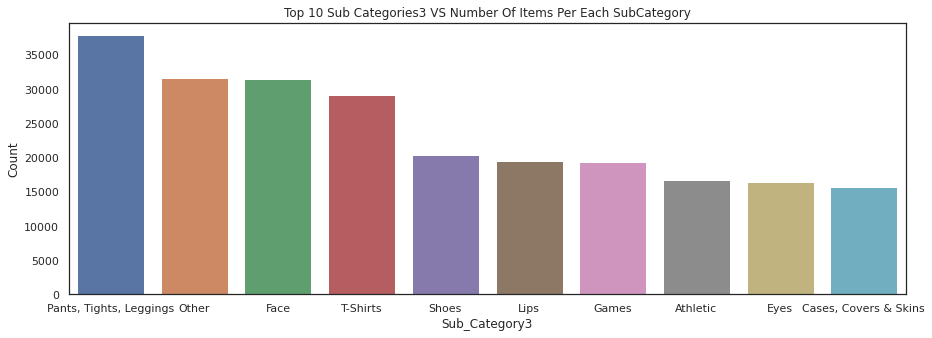

In [ ]:

count=train_data['sub_category3'].value_counts()
print("Number Of Unique Category3: {}".format(len(count)))
plt.figure(figsize=(15,5))
sns.barplot(count.index[:10],count[:10])
plt.xlabel('Sub_Category3')
plt.ylabel('Count')
plt.title("Top 10 Sub Categories3 VS Number Of Items Per Each SubCategory")
plt.show()

Observations:

*   Pants,Tights,Leggings ,Face and Other categories are the top three repeating things in subcategory level3.
*   cases,covers and skins  along with subcategory3 Eyes have least number of products compare to other categories
*   It is clear that the dataset contains products related to womens the most like cosmotics, dresses and some related accessories of womens.


Number of Unique Brands: 4285


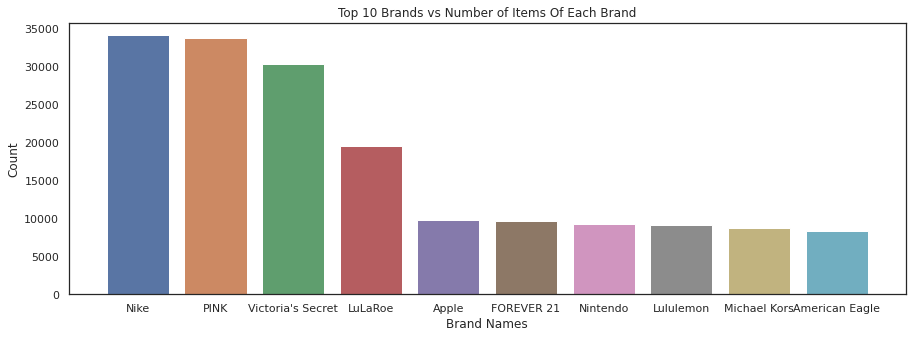

In [ ]:
unique_brands=train_data['brand_name'].value_counts()
print("Number of Unique Brands: {}".format(len(unique_brands)))
plt.figure(figsize=(15,5))
sns.barplot(unique_brands.index[1:11],unique_brands[1:11])
plt.title('Top 10 Brands vs Number of Items Of Each Brand')
plt.xlabel('Brand Names')
plt.ylabel('Count')
plt.plot()
plt.show()

Observations:

*   Nike , PINK and Victoria's Secret are the 3 most prominent brands in dataset.
*   i have skiped the unknown brand here 

 ***Price comaprison of Branded Products VS Unknown Brand Products:***

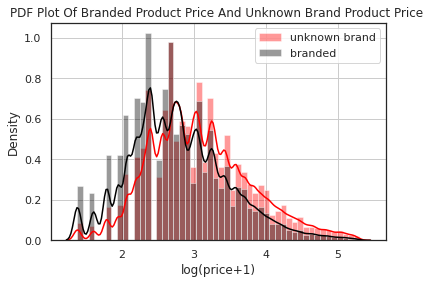

In [ ]:
unknown_brand=np.log(train_data.loc[train_data['brand_name']!='Not known','price']+1)
brand=np.log(train_data.loc[train_data['brand_name']=='Not known','price']+1)
sns.distplot(unknown_brand,label='unknown brand',color='red')
sns.distplot(brand,label='branded',color='black')
plt.title('PDF Plot Of Branded Product Price And Unknown Brand Product Price ')
plt.xlabel('log(price+1)')
plt.grid()
plt.legend()
plt.show()

***Observations:***

*   As visible from the distplot the price of branded products have high peakedness than the products with no brand.
*   we can conclude from this that the products having their brands mentioned have higher prices.
*   90 percent of both the plots are coinciding with each other.

**Sub_category VS price:**

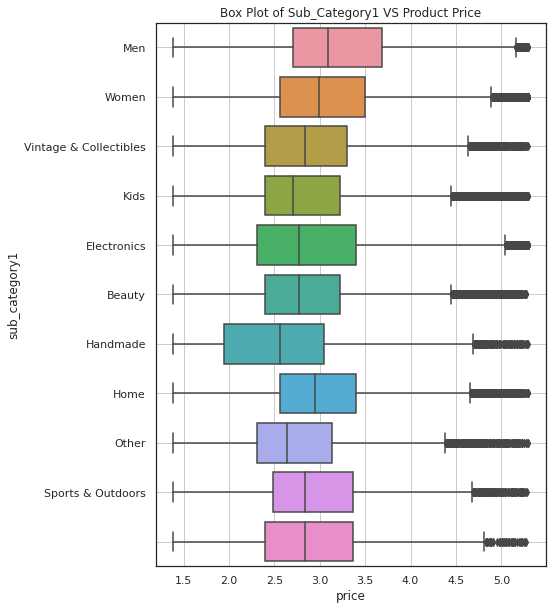

In [ ]:
plt.figure(figsize=(7,10))
sns.boxplot(y=train_data['sub_category1'],x=np.log(train_data['price']+1))
plt.title('Box Plot of Sub_Category1 VS Product Price')
plt.grid()
plt.show()

***Observations:***

*   Women and vintage & collectibles have a very high number of positive outliers
*   The categories like Men , Electronics, Women and  Sports & outdoors have a bit of positive skewness in their values.
*   The product with highest price has a main category-women. The next to it is Electronics.
*   The 50th percentile of Electronics is the highest among all the above categories.
*   The cheapest product has a category Handmade from the above categories.
*   Handmade has high amount of data in first quartile

 ### Feature Engineering part-1

For textual data we can perform following feature engineering:
 1.  Number of stopwords
 2.  count of the words
 3.  Presence of Numerical data
 4.  Sentiment score Analysis.

Feature Engineering on textual Data:

https://towardsdatascience.com/understanding-feature-engineering-part-3-traditional-methods-for-text-data-f6f7d70acd41

Let's count number of stop words in the given item description.
This will be our new feature.

In [ ]:
stopwords=set(stopwords.words('english'))

In [ ]:

def stopwords_count(data):
  """this function counts the number of stopwords in each of the item_description"""
  count_stopwords=[]
  for i in tqdm(data['item_description']):
    count=0
    for j in i.split(' '):
      if j in stopwords: count+=1  #finding if the word is present in the nltk stopwords or not
    count_stopwords.append(count)
  return count_stopwords

In [ ]:
train_data['count_stopwords']=stopwords_count(train_data)
cv_data['count_stopwords']=stopwords_count(cv_data)
test_data['count_stopwords']=stopwords_count(test_data)

100%|██████████| 444761/444761 [00:01<00:00, 226834.99it/s]


In [ ]:
train_data['count_stopwords'].describe()

count    926609.000000
mean          5.957684
std           9.036989
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max          97.000000
Name: count_stopwords, dtype: float64

***Replacing shorthands with full forms. Here the words like won’t will be replaced with will not etc..,***

In [ ]:
# https://stackoverflow.com/a/47091490/4084039
#reference - Aplied Ai course
def decontracted(phrase):
    """this function removies shorthands for the textual data..."""
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

**Removing StopWords**

Removing Stopwords is one of the most common practices while dealing with Textual data. Usually text data contains stopwords which are no more useful as features as they are just to make a complete meaning in the english language
Hence it is necessary to remove stopwords which are not useful for the regression model.
One way to do that is by using nltk (Natural Language Tool Kit)

In [ ]:
# https://gist.github.com/sebleier/554280
def text_preprocessing(data):
  """this function performs preprocessing the item_description """
  preprocessed_total = []
  for sentance in tqdm(data['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)  #removing stop words
    preprocessed_total.append(sent.lower().strip())
  return preprocessed_total

In [ ]:
train_data['item_description']=text_preprocessing(train_data)
cv_data['item_description']=text_preprocessing(cv_data)
test_data['item_description']=text_preprocessing(test_data)

100%|██████████| 444761/444761 [00:12<00:00, 36544.43it/s]


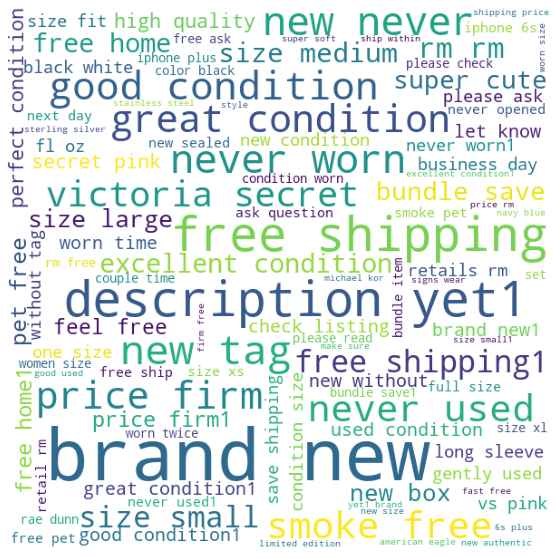

In [ ]:
stopwords=set(STOPWORDS)
word_cloud = WordCloud(width = 600, height = 600,background_color ='white', stopwords=stopwords,min_font_size = 10).generate("1 ".join(train_data['item_description']))
plt.figure(figsize = (15, 10))
plt.imshow(word_cloud)
plt.axis('off')                                             
plt.show()

**Observations:**

*   Words with larger fonts are more prominent in item description and as visible from wordcloud "brand new" is the word with       the largest font.  
*   From the above wordcloud (brand,new,free,shipping,description,yet) are the most common words in the item description.
*   Words like "Condition" and "Shipping" play a major role in item description to generate more purchase 
*   Sellers are using new,free,shipping,description words to advertise their products to the buyers.
*   the biggest brand name visisble from the word cloud is "Victoria Secret"

In [ ]:
word_count={} #Python dictionary to store the word and its count  
for sentence in tqdm(train_data['item_description']):
    for word in sentence.split(' '):
        if len(word)>=3:  #taking words which are of length>=3
            if word not in word_count:
                word_count[word]=1  #if word not present in dict assigning it to 1
            else:
                word_count[word]+=1 #else incrementing it by 1

100%|██████████| 926609/926609 [00:08<00:00, 109426.98it/s]


In [ ]:
n_print=20
word_counter = collections.Counter(word_count)
words=[]
counter=[]
for word, count in word_counter.most_common(n_print):
    words.append(word)
    counter.append(count)

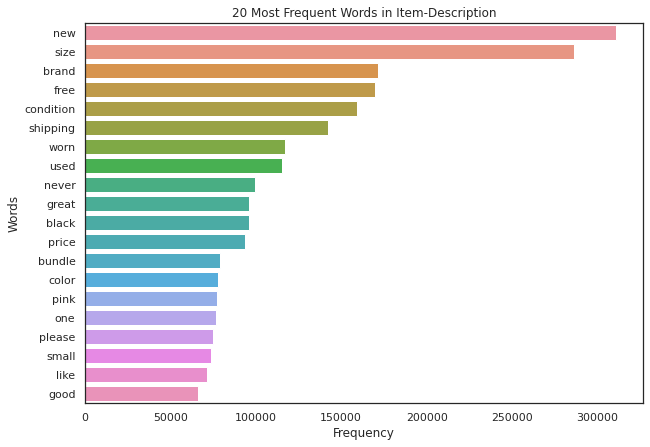

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(counter,words)
plt.title("20 Most Frequent Words in Item-Description")
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

**Observations:**

*   new and size are the two top words that are repeating in the item description.
*   Nearly 45 lakhs of products use new in their item description.

***Feature Engineering(Part-2)***

As the next feature engineering task I have decided to use count of words and sentiment score analysis as the new features in our task.

In [ ]:
def description_length(data):
  """this function finds the length of the description basing on spaces in the statement"""
  description_length=[]
  for i in data['item_description']:
    description_length.append(len(i.split(' '))) #splitting statement using spaces and finding length of it
  return description_length

In [ ]:
train_data['description_length']=description_length(train_data)
cv_data['description_length']=description_length(cv_data)
test_data['description_length']=description_length(test_data)

In [ ]:
train_data['description_length'].describe()

count    926609.000000
mean         17.979682
std          20.599748
min           1.000000
25%           6.000000
50%          11.000000
75%          21.000000
max         251.000000
Name: description_length, dtype: float64

**Feature Engineering(Part-3):**

***Is_branded:***

* We cam see that most of the products don't have brand.That can be used as a feature for our data.
* We know that a product with different brands vary with their price. This is based on the company which it is producing.
* A good brand will have a good price compared to the same product of different brand.
* Therefore two similar products with different brands(known brand,unknown brand) can help us to know the price of the product.
* If it's a branded product then it has a value of 1 else it has a value of 0

In [ ]:
def branded(data):
   """this function assigns a value 1 if a product has brand_name else 0"""
   is_branded=[]
   for i in data['brand_name']:
      if i=='Not known': is_branded.append(0) #if it is a Nan value i.e.. unknown brand make it as 0.
      else: is_branded.append(1)
   return is_branded
train_data['is_branded']=branded(train_data)


In [ ]:
cv_data['is_branded']=branded(cv_data)
test_data['is_branded']=branded(test_data)

**Feature Engineering(Part-4)**

***Sentiment Score Analysis:***

1.   Sentiment Score Analysis is often used as a feature engineering hack dealing with textual data.
2.   It tries to identify and extract opinions within a given text.
3.   Sentiment Analysis is a tricky part but it comes into handy by using nltk in python.
3.   It is going to return four values: positive, negative, neutral, and compound.


https://www.geeksforgeeks.org/facebook-sentiment-analysis-using-python/

***==> How Sentiment Score Analysis helps us in our task??***

More often a positive description product may charge high. similarly a negative description product may charge low.
That means their is some correlation with the description and the price(target value) in our data and it signs a good vibes for our task.

In [ ]:
def sentiment_analysis(data):
   """this function performs sentiment score analysis of each datapoint"""
   sentiment_score = SentimentIntensityAnalyzer()
   sentiment = []
   for sentence in tqdm(data):
       sentiment.append(sentiment_score.polarity_scores(sentence))
   return sentiment

In [ ]:
training_sentiment_score=sentiment_analysis(train_data['item_description']) 
cv_sentiment_score=sentiment_analysis(cv_data['item_description'])
testing_sentiment_score=sentiment_analysis(test_data['item_description'])

100%|██████████| 444761/444761 [01:47<00:00, 4153.91it/s]


In [ ]:
def splitting_sentiment(sentiment_score):
  """this function splits sentiment analysis score into four further features ie positive,negative,compound and neutral"""
  positive=[]
  negative=[]
  neutral=[]
  compound=[]
  for i in sentiment_score:
    positive.append(i['pos'])
    negative.append(i['neg'])
    neutral.append(i['neu'])
    compound.append(i['compound'])
  return positive,negative,neutral,compound

In [ ]:
print("Training Data Sentiment Analysis: ")
pos,neg,neu,comp=splitting_sentiment(training_sentiment_score)
train_data['positive']=pos
train_data['negative']=neg
train_data['neutral']=neu
train_data['compound']=comp
print(train_data.iloc[50]['item_description'])
print(training_sentiment_score[50])

Training Data Sentiment Analysis: 
tc dinosaurs worn maybe twice washed per llr instructions trying fund family vacation
{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'compound': -0.296}


In [ ]:
print("CV Data Sentiment Analysis: ")
pos,neg,neu,comp=splitting_sentiment(cv_sentiment_score)
cv_data['positive']=pos
cv_data['negative']=neg
cv_data['neutral']=neu
cv_data['compound']=comp
print(cv_data.iloc[50]['item_description'])
print(cv_sentiment_score[50])

CV Data Sentiment Analysis: 
used perfectly functional couple wear marks nothing major
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6369}


In [ ]:
print("Testing Data Sentiment Analysis: ")
pos,neg,neu,comp=splitting_sentiment(testing_sentiment_score)
test_data['positive']=pos
test_data['negative']=neg
test_data['neutral']=neu
test_data['compound']=comp
print(test_data.iloc[50]['item_description'])
print(testing_sentiment_score[50])

Testing Data Sentiment Analysis: 
hard find xl maxi gorgeous unicorn medallion print cost lot retail get reason asking higher price would like get money back slinky material check listings bundle save shipping
{'neg': 0.04, 'neu': 0.684, 'pos': 0.276, 'compound': 0.8519}


In [ ]:
train_data['target']=np.log(np.array(train_data['price'].values)+1)
cv_data['target']=np.log(np.array(cv_data['price'].values)+1)

**Feature Extraction:**

 *   After **EDA** and **Preprocessing** the data the next step is **Feature Extraction** which is method to extract features        from the data.
 *   Their are different categories of features like categorical, numerical, textual etc..,
 *   Textual Feature Extraction can be done through vectorization.
 *   For Categorical Features we use simple **BagOfWords** and for textual data we use **TFIDF** Vectorizer(Term Frequency Inverse Document Frequency).

**Vectorization**

***Categorical Features:***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#### Countvectorization on subcategory1 

countvectorizer=CountVectorizer().fit(train_data['sub_category1'])                     #fitting

#### Same fit will be applied on all datasets

bow_cat1_train=countvectorizer.transform(train_data['sub_category1'])
bow_cat1_cv=countvectorizer.transform(cv_data['sub_category1'])
bow_cat1_test=countvectorizer.transform(test_data['sub_category1'])
print("After Vectorization of sub category1 feature: ")
print(bow_cat1_train.shape)
print(bow_cat1_cv.shape)
print(bow_cat1_test.shape)
print("Some Features are: ")
print(countvectorizer.get_feature_names())
print("="*125)

#### Countvectorization on subcategory2 

countvectorizer=CountVectorizer().fit(train_data['sub_category2'])   #fitting
bow_cat2_train=countvectorizer.transform(train_data['sub_category2'])
bow_cat2_cv=countvectorizer.transform(cv_data['sub_category2'])
bow_cat2_test=countvectorizer.transform(test_data['sub_category2'])
print("After Vectorization of sub category2 feature: ")
print(bow_cat2_train.shape)
print(bow_cat2_cv.shape)
print(bow_cat2_test.shape)
print("Some Features are: ")
print(countvectorizer.get_feature_names()[50:75])
print("="*125)

#### Countvectorization on subcategory3 

countvectorizer=CountVectorizer().fit(train_data['sub_category3'])   #fitting
bow_cat3_train=countvectorizer.transform(train_data['sub_category3'])
bow_cat3_cv=countvectorizer.transform(cv_data['sub_category3'])
bow_cat3_test=countvectorizer.transform(test_data['sub_category3'])
print("After Vectorization of sub category3 feature: ")
print(bow_cat3_train.shape)
print(bow_cat3_cv.shape)
print(bow_cat3_test.shape)
print("Some Features are: ")
print(countvectorizer.get_feature_names()[50:75])
print("="*125)

#### Countvectorization on brandname 


countvectorizer=CountVectorizer().fit(train_data['brand_name'])  #fitting
bow_brand_train=countvectorizer.transform(train_data['brand_name'])
bow_brand_cv=countvectorizer.transform(cv_data['brand_name'])
bow_brand_test=countvectorizer.transform(test_data['brand_name'])
print("After Vectorization of brand_name feature: ")
print(bow_brand_train.shape)
print(bow_brand_cv.shape)
print(bow_brand_test.shape)
print("Some Features are: ")
print(countvectorizer.get_feature_names()[50:75])
print("="*125)

After Vectorization of sub category1 feature: 
(926609, 12)
(102957, 12)
(444761, 12)
Some Features are: 
['beauty', 'collectibles', 'electronics', 'handmade', 'home', 'kids', 'men', 'other', 'outdoors', 'sports', 'vintage', 'women']
After Vectorization of sub category2 feature: 
(926609, 141)
(102957, 141)
(444761, 141)
Some Features are: 
['feeding', 'footwear', 'fragrance', 'furniture', 'games', 'gear', 'geekery', 'girls', 'glass', 'golf', 'goods', 'gps', 'hair', 'handbags', 'health', 'holidays', 'home', 'hoodies', 'housewares', 'instruments', 'items', 'jackets', 'jeans', 'jewelry', 'kids']
After Vectorization of sub category3 feature: 
(926609, 952)
(102957, 952)
(444761, 952)
Some Features are: 
['baskets', 'bass', 'bath', 'bathing', 'bathroom', 'batteries', 'beach', 'bead', 'beading', 'beads', 'bear', 'bears', 'bed', 'bedding', 'bedroom', 'beds', 'bedspreads', 'beer', 'belt', 'belts', 'beverage', 'bibles', 'bibs', 'bicycle', 'bike']
After Vectorization of brand_name feature: 
(92

In [ ]:
#### Countvectorization on name

countvectorizer=CountVectorizer(min_df=10).fit(train_data['name'])  #fitting
bow_name_train=countvectorizer.transform(train_data['name'])
bow_name_cv=countvectorizer.transform(cv_data['name'])
bow_name_test=countvectorizer.transform(test_data['name'])
print("After Vectorization of brand_name feature: ")
print(bow_name_train.shape)
print(bow_name_cv.shape)
print(bow_name_test.shape)
print("Some Features are: ")
print(countvectorizer.get_feature_names()[10000:10025])

After Vectorization of brand_name feature: 
(926609, 14123)
(102957, 14123)
(444761, 14123)
Some Features are: 
['primrose', 'prince', 'princess', 'princesses', 'print', 'printed', 'printer', 'printing', 'prints', 'priority', 'prism', 'prismacolor', 'prismatic', 'prison', 'prisoner', 'privacy', 'private', 'prizm', 'prm', 'pro', 'proactiv', 'proactive', 'probiotic', 'processor', 'product']


In [ ]:
#### Countvectorization on Item Description

tfidfvectorizer=TfidfVectorizer(ngram_range=(1,2),min_df=10,max_features=5000).fit(train_data['item_description']) #fitting
tfidf_description_train=tfidfvectorizer.transform(train_data['item_description'])
tfidf_description_cv=tfidfvectorizer.transform(cv_data['item_description'])
tfidf_description_test=tfidfvectorizer.transform(test_data['item_description'])
print("After Vectorization of item description feature: ")
print(tfidf_description_train.shape)
print(tfidf_description_cv.shape)
print(tfidf_description_test.shape)
print("Some Features are: ")
print(tfidfvectorizer.get_feature_names()[3025:3050])  #getting 25 random features.

After Vectorization of item description feature: 
(926609, 5000)
(102957, 5000)
(444761, 5000)
Some Features are: 
['pacsun', 'pad', 'padded', 'padding', 'pads', 'page', 'pages', 'paid', 'paid product', 'paid rm', 'pain', 'paint', 'painted', 'pair', 'pair rm', 'paired', 'pairs', 'pairs rm', 'paisley', 'pajama', 'pajamas', 'pale', 'pale pink', 'palette', 'palettes']


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(np.array(train_data['positive']).reshape(-1,1))   #fitting
positive_train = scaler.transform(np.array(train_data['positive']).reshape(-1,1))
positive_cv = scaler.transform(np.array(cv_data['positive']).reshape(-1,1))
positive_test = scaler.transform(np.array(test_data['positive']).reshape(-1,1))
print(positive_train[50:55].reshape(1,-1)[0])    #printing 5 random postive sentiment scores 
print("After Preprocessing of positive sentiment score:")
print(positive_train.shape)
print(positive_cv.shape)
print(positive_test.shape)
print("="*125)
scaler = StandardScaler().fit(np.array(train_data['negative']).reshape(-1,1))  #fitting
negative_train=scaler.transform(np.array(train_data['negative']).reshape(-1,1))
negative_cv=scaler.transform(np.array(cv_data['negative']).reshape(-1,1))
negative_test=scaler.transform(np.array(test_data['negative']).reshape(-1,1))
print(negative_train[25:30].reshape(1,-1)[0])    #printing 5 random negative sentiment score
print("After Preprocessing of negative sentiment score:")
print(negative_train.shape)
print(negative_cv.shape)
print(negative_test.shape)
print("="*125)
scaler = StandardScaler().fit(np.array(train_data['neutral']).reshape(-1,1))   #fitting
neutral_train=scaler.transform(np.array(train_data['neutral']).reshape(-1,1))
neutral_cv=scaler.transform(np.array(cv_data['neutral']).reshape(-1,1))
neutral_test=scaler.transform(np.array(test_data['neutral']).reshape(-1,1))
print(neutral_train[5:10].reshape(1,-1)[0])     #printing 5 random neutral sentiment score
print("After Preprocessing of neutral sentiment score:")
print(neutral_train.shape)
print(neutral_cv.shape)
print(neutral_test.shape)
print("="*125)
scaler = StandardScaler().fit(np.array(train_data['compound']).reshape(-1,1))  #fitting
compound_train=scaler.transform(np.array(train_data['compound']).reshape(-1,1))
compound_cv=scaler.transform(np.array(cv_data['compound']).reshape(-1,1))
compound_test=scaler.transform(np.array(test_data['compound']).reshape(-1,1))
print(compound_train[35:40].reshape(1,-1)[0])   #printing 5 random compound sentiment score
print("After Preprocessing of compound sentiment score:")
print(compound_train.shape)
print(compound_cv.shape)
print(compound_test.shape)
print("="*125)
scaler = StandardScaler().fit(np.array(train_data['description_length']).reshape(-1,1))  #fitting
length_train=scaler.transform(np.array(train_data['description_length']).reshape(-1,1))
length_cv=scaler.transform(np.array(cv_data['description_length']).reshape(-1,1))
length_test=scaler.transform(np.array(test_data['description_length']).reshape(-1,1))
print(length_train[1:5].reshape(1,-1)[0])       #printing 5 random description lengths
print("After Preprocessing of description length:")
print(length_train.shape)
print(length_cv.shape)
print(length_test.shape)
print("="*125)
scaler = StandardScaler().fit(np.array(train_data['count_stopwords']).reshape(-1,1))   #fitting
stopword_train=scaler.transform(np.array(train_data['count_stopwords']).reshape(-1,1))
stopword_cv=scaler.transform(np.array(cv_data['count_stopwords']).reshape(-1,1))
stopword_test=scaler.transform(np.array(test_data['count_stopwords']).reshape(-1,1))
print(stopword_train[15:20].reshape(1,-1)[0])   #printing 5 random stopwords count
print("After Preprocessing of count_stopwords feature:")
print(stopword_train.shape)
print(stopword_cv.shape)
print(stopword_test.shape)

[-1.0228598  -0.06752437 -1.0228598   2.28290407  0.81704547]
After Preprocessing of positive sentiment score:
(926609, 1)
(102957, 1)
(444761, 1)
[-0.41822663 -0.41822663 -0.41822663 -0.41822663 -0.41822663]
After Preprocessing of negative sentiment score:
(926609, 1)
(102957, 1)
(444761, 1)
[ 1.1325865   1.1325865  -0.07744352 -1.98900846  1.1325865 ]
After Preprocessing of neutral sentiment score:
(926609, 1)
(102957, 1)
(444761, 1)
[0.10442344 0.69875183 0.45950304 0.20179213 0.10442344]
After Preprocessing of compound sentiment score:
(926609, 1)
(102957, 1)
(444761, 1)
[-0.77572262  1.4087713  -0.77572262 -0.63008969]
After Preprocessing of description length:
(926609, 1)
(102957, 1)
(444761, 1)
[-0.43794307 -0.65925585  0.33665166 -0.65925585  0.11533888]
After Preprocessing of count_stopwords feature:
(926609, 1)
(102957, 1)
(444761, 1)


In [ ]:
#https://stackoverflow.com/questions/36285155/pandas-get-dummies

features_train = csr_matrix(pd.get_dummies(train_data[['item_condition_id', 'shipping','is_branded']],sparse=True).values)
features_cv = csr_matrix(pd.get_dummies(cv_data[['item_condition_id', 'shipping','is_branded']],sparse=True).values)
features_test = csr_matrix(pd.get_dummies(test_data[['item_condition_id', 'shipping','is_branded']],sparse=True).values)
print(features_train.shape)
print(features_cv.shape)

print(features_test.shape)

(926609, 3)
(102957, 3)
(444761, 3)


In [ ]:
#https://stackoverflow.com/questions/43018711/about-numpys-concatenate-hstack-vstack-functions
from scipy.sparse import hstack
X_train=hstack((bow_cat1_train,bow_cat2_train,bow_cat3_train,bow_brand_train,bow_name_train,tfidf_description_train,positive_train,negative_train,neutral_train,compound_train,features_train,length_train,stopword_train)).tocsr()
X_cv=hstack((bow_cat1_cv,bow_cat2_cv,bow_cat3_cv,bow_brand_cv,bow_name_cv,tfidf_description_cv,positive_cv,negative_cv,neutral_cv,compound_cv,features_cv,length_cv,stopword_cv)).tocsr()
X_test=hstack((bow_cat1_test,bow_cat2_test,bow_cat3_test,bow_brand_test,bow_name_test,tfidf_description_test,positive_test,negative_test,neutral_test,compound_test,features_test,length_test,stopword_test)).tocsr()
print("Shape of train data: ",X_train.shape) #train
print("Shape of cv data: ",X_cv.shape)   #cv
print("Shape of test data: ",X_test.shape)   #test

Shape of train data:  (926609, 24794)
Shape of cv data:  (102957, 24794)
Shape of test data:  (444761, 24794)


In [ ]:
X_train

<926609x24794 sparse matrix of type '<class 'numpy.float64'>'
	with 32029008 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LinearRegression
linearregression=LinearRegression(normalize=True)
linearregression.fit(X_train,train_data['target'])  #fitting
ytrain_predict=linearregression.predict(X_train)
ycv_predict=linearregression.predict(X_cv)
train_error=np.sqrt(mean_squared_error(train_data['target'],ytrain_predict))
cv_error=np.sqrt(mean_squared_error(cv_data['target'],ycv_predict))
print("With Linear Regression RMSLE on train is {} RMSLE on cv is {}".format(train_error,cv_error))`

In [ ]:
#ycv_linear=linearregression.predict(X_cv)
ytest_linear=linearregression.predict(X_test)


In [ ]:
test=np.exp(ytest_linear)-1

In [ ]:
test

In [ ]:
len(test)

In [ ]:
tdata=pd.read_csv("/content/drive/MyDrive/test.tsv",sep='\t')

In [ ]:
res=pd.DataFrame({'id':tdata['id'],'price':test})

In [ ]:
res

In [ ]:
pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor
params={'learning_rate':[0.1],'max_depth':[15],'n_estimators':[200],'num_leaves':[75],'boosting_type':['gbdt']}
lgbm_regressor=LGBMRegressor(learning_rate=0.25,max_depth=15,n_estimators=1500,num_leaves=80,boosting_type='gbdt',sub_sample=0.9,colsample_bytree=0.8,min_child_samples=50)
#lgbm_regressor.fit(X_train,train_data['target'])

In [ ]:
train_data['price']

284810    30.0
468291    19.0
203672    14.0
968608    10.0
514781     7.0
          ... 
259178     8.0
365838    45.0
131932    24.0
671155    50.0
121958    15.0
Name: price, Length: 926609, dtype: float64

In [ ]:
lgbm_regressor.fit(X_train,train_data['target'])


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
              importance_type='split', learning_rate=0.2, max_depth=15,
              min_child_samples=50, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1500, n_jobs=-1, num_leaves=80, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              sub_sample=0.9, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [ ]:
ytrain_predict=lgbm_regressor.predict(X_train)
ycv_predict=lgbm_regressor.predict(X_cv)
training = np.sqrt(mean_squared_error(train_data['target'], ytrain_predict))
cving=np.sqrt(mean_squared_error(cv_data['target'],ycv_predict))
print("RMSLE of train is {} RMSLE of test is {}".format(training,cving))

RMSLE of train is 0.3840477794791657 RMSLE of test is 0.4297652496266794


In [ ]:
ycv_lgbm=lgbm_regressor.predict(X_cv)
ytest_lgbm=lgbm_regressor.predict(X_test)

In [ ]:
test=np.exp(ytest_lgbm)-1

In [ ]:
test 

array([40.52983596, 70.03749887, 24.15890839, ..., 54.72449348,
       22.54345811, 15.109076  ])

In [ ]:
len(test)

444761

In [ ]:
X_test.shape

(444761, 24794)

In [ ]:
testdd=pd.read_csv("/content/drive/MyDrive/test.tsv",sep='\t')

In [ ]:
testdd.shape

(444761, 7)

In [ ]:
len(testdd['id'])

444761

In [ ]:
res=pd.DataFrame({'id':testdd['id'],'price':test})

In [ ]:
res.to_csv('out6.csv',index=False)